In [1]:
#%%appyter init
from appyter import magic
magic.init(lambda _=globals: _())

### Load all necessary packages

In [2]:
import rpy2
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages

from rpy2.robjects import numpy2ri, pandas2ri

import rpy2.ipython.html
rpy2.ipython.html.init_printing()

import rpy2.robjects.lib.ggplot2 as gp
from rpy2.ipython.ggplot import image_png

from rpy2.rinterface_lib import openrlib

robjects.r('''

library(MetENP)

''')
;

''

In [3]:
%%appyter hide_code
{% do SectionField(
    name='INPUT',
    title='Input Datasets',
    subtitle='Add your dataset here',
    img='upload_icon.png',
)%}
{% do SectionField(
    name='SIGM',
    title='Find Significant Metabolites',
    subtitle='Run significance of all the analysis summary together',
    img='vol.png',
)%}
{% do SectionField(
    name='COUNTCLASS',
    title='Count Metabolites by Class',
    subtitle='Count the metabolites of each class',
    img='bar.png',
)%}
{% do SectionField(
    name='ENRICH',
    title='Enrichment Score by Class',
    subtitle='Calculate the enrichment score of each metabolite class',
    img='enrich.png',
)%}
{% do SectionField(
    name='HEAT',
    title='Heatmap',
    subtitle='Heatmap of metabolites x enriched pathways',
    img='heat.png',
)%}
{% do SectionField(
    name='DOT',
    title='Dotplot',
    subtitle='Plot a dotplot of enrichment by class',
    img='dot.png',
)%}


In [4]:
%%appyter hide_code

{% set study_id = StringField(name='study_id', label='DatasetID', description = "Type your datasetID here", default='ST000915', section='INPUT') %}

In [5]:
%%appyter hide_code 

{% set studyOrg = StringField(name='studyOrg', label='KEGG Organism Code', description = "hsa for human, mmu for mouse, eco for E. coli. See https://www.genome.jp/kegg/catalog/org_list.html for all organisms", default='hsa', section='INPUT') %}

In [6]:
%%appyter hide_code

{% set classtype = MultiChoiceField(
    name='classtype',
    label='Choose a Metabolite Class',
    description='Choose between sub_class, main_class and super_class',
    default=[
        'sub_class',
    ],
    choices=[
        'sub_class',
        'main_class',
        'super_class',
    ],
    section='INPUT'
) %}

### Start data processing

In [7]:
%%appyter code_exec

data_1 = robjects.r['getmwstudies']({{
     study_id}}, 
    'data'
)

```python
data_1 = robjects.r['getmwstudies']('ST000915',
    'data'
)
```

In [8]:
with openrlib.rlock:
    
    robjects.r.assign('data_1', data_1)
    
    robjects.r('''

    data_1_print = data.frame(apply(data_1, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
    head(data_1_print)

    ''')
    
    pass

In [9]:
%%appyter code_exec

metadata = robjects.r['getmwstudies']({{
     study_id}}, 
    'factors'
)


```python
metadata = robjects.r['getmwstudies']('ST000915',
    'factors'
)
```

In [10]:
robjects.r.assign('metadata', metadata)

robjects.r('''
metadata_print = data.frame(apply(metadata, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
head(metadata_print)
''')

,,study_id,local_sample_id,subject_type,factors,Diagnosis
0,1,ST000915,NASH005,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
1,2,ST000915,NASH007,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
2,3,ST000915,NASH009,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
3,4,ST000915,NASH013,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
4,5,ST000915,NASH016,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis
5,6,ST000915,NASH022,Human clinical study,Diagnosis:Cirrhosis,Cirrhosis


Find the factors you would want to compare
Multiple factors (independent variables) are formatted in multiple columns but you can get information on all the factors by "factors" column, such as 'TreatmentGroup:Prednisolone', this indicates column name 'TreatmentGroup' with factor Prednisolone. For t-test use the factors in the same column. For comparing multipe independent variables use anova by anova_ana function.

### Associate metabolomics data to the refmet class

In [11]:
refmet_class = robjects.r['convert_refmet'](data_1)

robjects.r.assign('refmet_class', refmet_class)

robjects.r('''

refmet_class_print = data.frame(apply(refmet_class, c(1,2), function(x){unlist(x, TRUE, TRUE)}))
head(refmet_class_print)

''')

,,metabolite_name,analysis_id,analysis_summary,metabolite_id,...,main_class,sub_class
0,1,"1,2-DG(30:0)",AN001488,Core E Neutral Lipids,ME231190,...,Diradylglycerols,DAG
1,2,"1,2-DG(30:1)",AN001488,Core E Neutral Lipids,ME231189,...,Diradylglycerols,DAG
2,3,"1,2-DG(32:0)",AN001488,Core E Neutral Lipids,ME231196,...,Diradylglycerols,DAG
3,4,"1,2-DG(32:1)",AN001488,Core E Neutral Lipids,ME231195,...,Diradylglycerols,DAG
4,5,"1,2-DG(32:2)",AN001488,Core E Neutral Lipids,ME231194,...,Diradylglycerols,DAG
5,6,"1,2-DG(32:3)",AN001488,Core E Neutral Lipids,ME231193,...,Diradylglycerols,DAG


### Each different metadata factors 

In [12]:
robjects.r('''
data.frame(unique(metadata_print$factors))
''')

,,unique.metadata_print.factors.
0,1,Diagnosis:Cirrhosis
1,2,Diagnosis:NASH
2,3,Diagnosis:Normal
3,4,Diagnosis:Steatosis


### Each different analysis terms

In [13]:
robjects.r('''
data.frame(unique(data_1_print$analysis_summary))
''')

,,unique.data_1_print.analysis_summary.
0,1,Core G Fatty acids/Eicosanoids
1,2,Core J Sterols
2,3,Core K Prenols/Cardiolipins
3,4,Core E Neutral Lipids
4,5,Core I Sphingolipids
5,6,Core H Phospholipids


### Find significant metabolites, run significance of all the analysis summary together. The analysis summary/modes you got in the previous section

In [14]:
%%appyter hide_code

{% set metcol = StringField(
    name = 'metcol',
    label = 'Metabolite Column Names',
    description= "Column with Metabolites Names",
    default='metabolite_name',
    section='SIGM'
) %}

{% set mettit = StringField(
    name = 'mettit',
    label = 'Metabolite Column Titles',
    description= "Seperate multiple by a comma. Must be exact wording.",
    default='Core G Fatty acids/Eicosanoids, Core J Sterols, Core K Prenols/Cardiolipins, Core E Neutral Lipids, Core I Sphingolipids, Core H Phospholipids',
    section='SIGM'
) %}

{% set fac1 = StringField(
    name = 'fac1',
    label = 'Metabolite Factor 1 for Analysis',
    description= "First independent variable",
    default='Cirrhosis',
    section='SIGM'
) %}

{% set fac2 = StringField(
    name = 'fac2',
    label = 'Metabolite Factor 2 for Analysis',
    description= "Second independent variable",
    default='Normal',
    section='SIGM'
) %}

{% set faccol = StringField(
    name = 'faccol',
    label = 'Factor Column Name',
    description= "Factor Column Name",
    default='Diagnosis',
    section='SIGM'
) %}

{% set samcol = StringField(
    name = 'samcol',
    label = 'Sample Column Name',
    description= "Sample Column Name",
    default='local_sample_id',
    section='SIGM'
) %}

In [15]:
%%appyter hide_code

{% set normtype = MultiChoiceField(
    name='normtype',
    label='Select Type of Normalization. How would you like to handle missing data?',
    description='Select 1. half_of_min: where the NAs are replaced by half of min values in the data, 2. remove_NAs: where Cols with NAs values are removed, or 3. 50percent: where cols with more than 50% NAs values are removed. half_of_min is ideal when you wish to see which metabolites were present in either group. Very high fold change would mean it was present in either group.',
    default=[
        '50percent',
    ],
    choices=[
        'half_of_min',
        'remove_NAs',
        '50percent',
    ],
    section='SIGM'
) %}


In [16]:
%%appyter hide_code

{% set pthres = MultiChoiceField(
    name='pthres',
    label='P-Value Threshhold',
    description='For Volcano Plot. Float between 0 and 1.',
    default=[
        '0.05',
    ],
    choices=[
        '0.001',
        '0.002',
        '0.005',
        '0.01',
        '0.02',
        '0.05'
    ],
    section='SIGM'
) %}


In [17]:
%%appyter hide_code

#0.0, 0.5, 0.6, 0.8, 1, 1.2, 1.5, 2, 2.5, 3
#TODO - don't do yet 

{% set thres_log2foldchange = StringField(
    name = 'tres_log2foldchange',
    label = 'Log2FoldChange Threshhold',
    description= "For Volcano Plot.",
    default='0.5',
    section='SIGM'
) %}


```python
#0.0, 0.5, 0.6, 0.8, 1, 1.2, 1.5, 2, 2.5, 3
#TODO - don't do yet
```

In [18]:
%%appyter hide_code

{% set padj = MultiChoiceField(
    name='padj',
    label='Select P Adjust Method',
    description='TODO',
    default=[
        'fdr',
    ],
    choices=[
        'fdr',
        'BH',
        'holm',
        'bonferroni',
        'hochberg',
        'hommel',
    ],
    section='SIGM'
) %}

In [19]:
%%appyter code_eval

robjects.r.assign('refmet_class', refmet_class)
robjects.r.assign('metcol', {{metcol}})
robjects.r.assign('fac1', {{fac1}})
robjects.r.assign('fac2', {{fac2}})
robjects.r.assign('faccol', {{faccol}})
robjects.r.assign('samcol', {{samcol}})
robjects.r.assign('normtype', {{normtype}})
robjects.r.assign('pthres', {{pthres}})
robjects.r.assign('thres_log2foldchangevar', {{thres_log2foldchange}})
robjects.r.assign('padj', {{padj}})

```python
robjects.r.assign('refmet_class', refmet_class)
robjects.r.assign('metcol', 'metabolite_name')
robjects.r.assign('fac1', 'Cirrhosis')
robjects.r.assign('fac2', 'Normal')
robjects.r.assign('faccol', 'Diagnosis')
robjects.r.assign('samcol', 'local_sample_id')
robjects.r.assign('normtype', ['50percent'])
robjects.r.assign('pthres', ['0.05'])
robjects.r.assign('thres_log2foldchangevar', '0.5')
robjects.r.assign('padj', ['fdr'])
```

0,"[1] ""fdr"""


In [20]:
robjects.r('''
ptreshnum<-as.numeric(pthres)
thres_log2foldchangenum<-as.numeric(thres_log2foldchangevar)
padjchar<-as.character(padj[1])
''')
;

''

In [21]:
%%appyter code_exec

robjects.r.assign('mettit', {{mettit}})

robjects.r('''

list_mettit <- strsplit(mettit, ',')
list_mettit = unlist(list_mettit, TRUE, TRUE)

titles <- list()
for(elm in list_mettit) {
    elm = trimws(elm)
    
    titles <- c(titles, elm)
}
''')

```python
robjects.r.assign('mettit', 'Core G Fatty acids/Eicosanoids, Core J Sterols, Core K Prenols/Cardiolipins, Core E Neutral Lipids, Core I Sphingolipids, Core H Phospholipids')
robjects.r('''
list_mettit <- strsplit(mettit, ',')
list_mettit = unlist(list_mettit, TRUE, TRUE)
titles <- list()
for(elm in list_mettit) {
    elm = trimws(elm)
    titles <- c(titles, elm)
}
''')
```

In [22]:
robjects.r('''
stats_metabolites = significant_met(metabolomics_data=refmet_class_print, met_col=metcol,analysis_type=c(titles), metadata=metadata, factor1=fac1, factor2=fac2, factor_col=faccol,sample_col=samcol, p_adjust=padjchar,normalization=normtype)
''')
;

''

In [23]:
robjects.r('''
sig_metabolites = stats_metabolites[which(stats_metabolites[,"pval"] <= ptreshnum&abs(stats_metabolites[,"log2Fold_change"])>thres_log2foldchangenum),]
''')
;

''

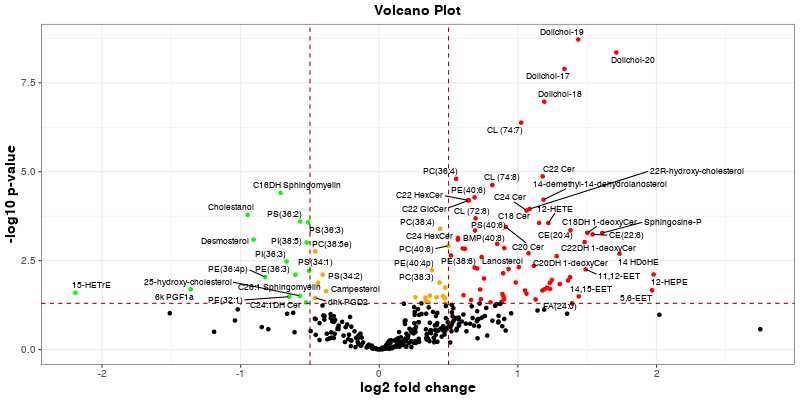

In [24]:
image_png(robjects.r('''
plot_volcano(stats_metabolites, thres_pval= ptreshnum, thres_log2foldchange = thres_log2foldchangenum, TRUE)
'''))

### Map metabolite class of the significant metabolites utilzing refmet classification in Metabolomics Workbench
This function not only maps metabolite to metabolite class but also to external databases such as pubchem, inchi key, smiles and kegg

In this example, we will go forward with significant metabolite obtained by t-test/

In [25]:
with openrlib.rlock:
    robjects.r('''
    sig_metabolites_kegg_id= map_keggid(sig_metabolites)
    ''')
    pass

#### Check all your significant metabolites have not been assigned metabolite class
Outcome should be 0 elements.

In [26]:
robjects.r('''
setdiff(sig_metabolites$refmet_name, sig_metabolites_kegg_id$refmet_name)
''')

<rpy2.robjects.vectors.StrVector object at 0x7fb7a9c3c5c0> [RTYPES.STRSXP]
R classes: ('character',)
[]

### Count metabolites in each of the metabolite class and plotting
You may choose from sub_class, main_class and super_class

In [27]:
%%appyter hide_code

{% set thres_log2foldchange_countclass = StringField(
    name = 'tres_log2foldchange_countclass',
    label = 'Log2FoldChange Threshhold',
    description= "Float between 0 and 1.",
    default='0.5',
    section='COUNTCLASS'
) %}

In [28]:
%%appyter code_exec

robjects.r.assign('classtype', {{classtype}})

robjects.r('''
metclassvar <- as.character(classtype[1])
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass=metclassvar, plotting=TRUE, thres_logfC = 0.5)
''')

```python
robjects.r.assign('classtype', ['sub_class'])
robjects.r('''
metclassvar <- as.character(classtype[1])
count_changes = metcountplot(df_metclass=sig_metabolites_kegg_id, metclass=metclassvar, plotting=TRUE, thres_logfC = 0.5)
''')
```

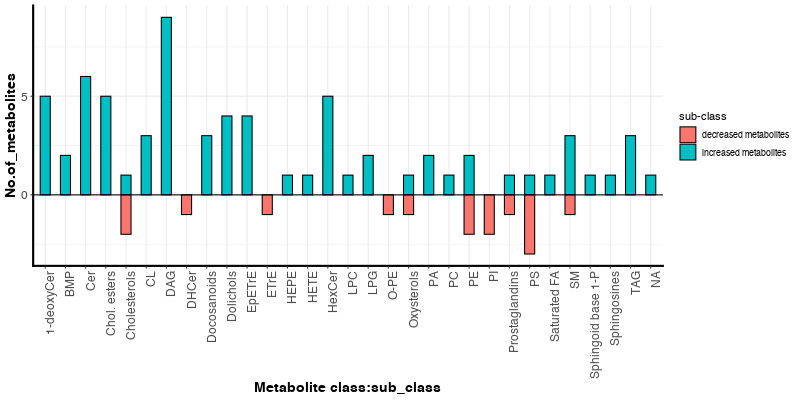

In [29]:
image_png(robjects.r('''
count_changes$plotimg
'''))

### Enrichment class score

Calculate the enrichment score of each metabolite class. Enrichment score is calculated through hypergeometric method. One can specify the no. of significant metabolites in a class while calculating the enrichment score. We advice to use the number of mtabolites in each class as 3 or more. But if someone just wants to know the enrichment score and rest of the information of all the metabolites, then they can choose the number as 1.

In [30]:
%%appyter hide_code

{% set sigmets = IntField(
    name = 'sigmets',
    label = 'Minimum # of (most significant) metabolites per class to use in group calculation.',
    description= "Number of significant metabolies in a class; suggested to be 3 or more.",
    default=3,
    section = 'ENRICH'
) %}

### If no figure shows here/an error returns, change the significant metabolites per class.

In [31]:
%%appyter code_eval
robjects.r.assign('sigmets', {{sigmets}})

```python

robjects.r.assign('sigmets', 3)
```

3


In [32]:
robjects.r('''
metenrichment = metclassenrichment(df_metclass=sig_metabolites_kegg_id,refmet_class, metclass=metclassvar,enrich_stats="HG",no=sigmets)
''')
;

''

#### Plot the enrichment score via function plot_met_enrichment

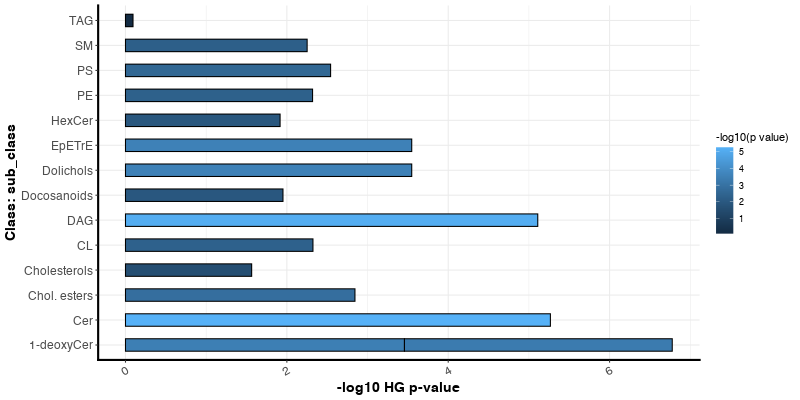

In [33]:
image_png(robjects.r('''
plot_met_enrichment(metenrichment, metclassvar,"HG", no=sigmets)
'''))

### Check the pathways with reactions of all the significant metabolites

In [34]:
%%appyter code_exec

robjects.r.assign('studyOrg', {{studyOrg}})

robjects.r('''
met_path = met_pathways(df_metenrichment = metenrichment, studyOrg)
head(met_path)
''')

```python
robjects.r.assign('studyOrg', 'hsa')
robjects.r('''
met_path = met_pathways(df_metenrichment = metenrichment, studyOrg)
head(met_path)
''')
```

### Get pathway enrichment sore.

Once we have the pathway information, we can calculate enrichment score of pathways. Again, here i have used hypergeometric score. For hypergeometric score, we need to know the total number of kegg compounds that are linked to kegg pathways. 
N = total no. of cmpds linked to kegg pathway (this is the step which might take long), so I advice to run the script comp_linkedto_pathways() just the first time or after 6 months or so if desired to run the pipeline again. save the result from comp_linkedto_pathways() and load it. Loading from saved file would save time for another analysis with another study. However the package takes care of loading. Save the data in the data folder.

L = No. of cmpds in a pathway
M= no. of altered cmpds in a pathway
K =  total no. of altered cmpds
phyper(M,L, N-L, K)


This function also utilizes korg dataset from pathview package.

In [55]:
%%appyter hide_code
#TODO: is this in the right section?

{% set keggTF = MultiChoiceField(
    name='keggTF',
    label='Analysis with KEGG',
    description='Would you like the enrichment analysis to occur with all KEGG pathways?',
    default=[
        'TRUE',
    ],
    choices=[
        'TRUE',
        'FALSE'
    ],
    section='ENRICH'
) %}

```python

#TODO: is this in the right section?
```

In [56]:
%%appyter code_exec

robjects.r.assign('keggTF', {{keggTF}})

robjects.r('''
keggTFchar<-as.character(keggTF[1])
''')

```python
robjects.r.assign('keggTF', ['TRUE'])
robjects.r('''
keggTFchar<-as.character(keggTF[1])
''')
```

In [57]:
%%appyter code_exec

korgvar = "{{ url_for('Users/Callie/Documents/199/MetENP/vignettes/static', filename='korg.RData') }}"
ls_pathvar = "{{ url_for('Users/Callie/Documents/199/MetENP/vignettes/static', filename='ls_path.RData') }}"

robjects.r.assign('korgvar', korgvar)
robjects.r.assign('ls_pathvar', ls_pathvar)

```python
korgvar = "/Users/Callie/Documents/199/MetENP/vignettes/static/korg.RData"
ls_pathvar = "/Users/Callie/Documents/199/MetENP/vignettes/static/ls_path.RData"
robjects.r.assign('korgvar', korgvar)
robjects.r.assign('ls_pathvar', ls_pathvar)
```

In [58]:
robjects.r('''
load(korgvar)
load(ls_pathvar)
''')

ls_path


In [59]:
robjects.r('''
kegg_es = path_enrichmentscore(met_path,sig_metabolite_kegg_id=sig_metabolite_kegg_id,ls_path=ls_path,refmet_class=refmet_class,sps=studyOrg,padj=padjchar, kegg_comp_path=keggTFchar)
head(kegg_es)
''')

,,Pathway name,No.of mets in study,Total_no._of_comps_in_pathway,pathway_HG p-value,Padjust
0,1,Arachidonic acid metabolism,4,75,0.019668949846418753,0.02185438871824306
1,2,Glycerolipid metabolism,12,38,4.436966799435257e-14,8.873933598870514e-14
2,3,Glycerophospholipid metabolism,17,52,6.877599018269616e-20,2.292533006089872e-19
3,4,"Glycine, serine and threonine metabolism",4,50,0.004831977527842819,0.006039971909803524
4,5,Glycosylphosphatidylinositol (GPI)-anchor biosynthesis,13,16,1.4082859665466043e-22,7.041429832733022e-22
5,6,Inositol phosphate metabolism,9,47,1.0658235044419277e-08,1.522605006345611e-08


### Plot pathway network
Only plotting significant pathways (pathway with p-value significance).

The pathway network is such that it shows metabolites that are connected to different pathways and same metabolite in different pathway. Color of nodes of metabolites are according to the fold change of metabolites (low expression in green and high in red) and size of pathway nodes (square nodes) are according to the number of branches (meaning no of metabolites). All metabolite are written in blue

In [ ]:
image_png(robjects.r('''
plot_pathway_networks (met_path,kegg_es, TRUE)
'''))

### Heatmap

In [ ]:
%%appyter hide_code

{% set x_size_heat = IntField(
    name = 'x_size_heat',
    label = 'Font Size for X',
    description= "To change the size of the heatmap",
    default=8,
    section = 'HEAT'
) %}

In [ ]:
%%appyter hide_code

{% set y_size_heat = IntField(
    name = 'y_size_heat',
    label = 'Font Size for Y',
    description= "To change the size of the heatmap",
    default=6,
    section = 'HEAT'
) %}

In [ ]:
%%appyter code_exec

robjects.r.assign('x_size_heat', {{x_size_heat}})
robjects.r.assign('y_size_heat', {{y_size_heat}})

In [ ]:
image_png(robjects.r('''
plot_heatmap(met_path, shorten_name=TRUE,refmet_name=FALSE, xaxis=x_size_heat, yaxis=y_size_heat)
'''))

### Dotplot

In [ ]:
%%appyter hide_code

{% set x_size_dot = IntField(
    name = 'x_size_dot',
    label = 'Font Size for X',
    description= "To change the size of the dotplot",
    default=8,
    section = 'DOT'
) %}

In [ ]:
%%appyter hide_code

{% set y_size_dot = IntField(
    name = 'y_size_dot',
    label = 'Font Size for Y',
    description= "To change the size of the dotplot",
    default=6,
    section = 'DOT'
) %}

In [ ]:
%%appyter code_exec

robjects.r.assign('x_size_dot', {{x_size_dot}})
robjects.r.assign('y_size_dot', {{y_size_dot}})

In [ ]:
image_png(robjects.r('''
dotplot_met_class_path (met_path, kegg_es, metclassvar,xaxis=x_size_dot,yaxis=y_size_dot)
'''))

### Get the gene and enzyme info

Here we get the information of genes involved in enriched pathways for specified organism

In [ ]:
robjects.r('''
met_gene_info = enzyme_gene_info (metenrichment, studyOrg, metclassvar)
head(met_gene_info)
''')

#### Get the information if metabolite is a reactant or substrate

In [ ]:
robjects.r('''
rclass_info = react_substrate(met_gene_info)
head(rclass_info)
''')

#### Get gene info in short form

In [ ]:
robjects.r('''
met_gene_info2=data.table::data.table(rclass_info)[,lapply(.SD, function(x) toString(unique(x))), by = 'Metabolite']
''')